In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
path1 = r"C:\Working\LAB\2025\K_Alzheimer\codes\dataset_adni_segmented\AD\I8022.npz"
path2 = r""
npz = np.load(path1)

(224, 224) 0 223
(224, 224) 0 158
(224, 224) 0 151


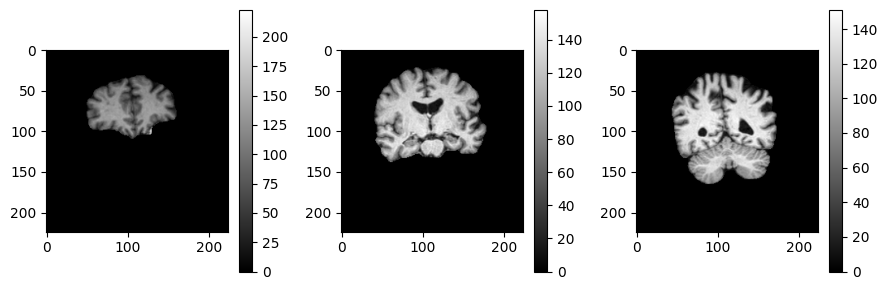

In [4]:
target_volume = npz["volume"]

frame0, frame1, frame2 = npz["volume"][60], npz["volume"][112], npz["volume"][159]

fig, axes = plt.subplots(1, 3, figsize=(9, 3))

for i, frame in enumerate([frame0, frame1, frame2]):
    print(frame.shape, np.min(frame), np.max(frame))
    im = axes[i].imshow(frame, cmap='gray')
    plt.colorbar(im)
    
plt.tight_layout()
plt.show()

In [ ]:
import cv2

for idx, data in enumerate([(96, 96+32, 1), (80, 80+64, 2), (64, 64+96, 2)]):
    fps = 10
    h, w = 224, 224
    fourcc = cv2.VideoWriter_fourcc(*'mp4v')
    out = cv2.VideoWriter(f'output_{idx+1}mm_32_slices.mp4', fourcc, fps, (w, h), isColor=False)

    count = 0
    for idx in range(*data):
        count += 1
        frame = target_volume[idx]
        frame_uint8 = np.clip(frame, 0, 1) * 255 if frame.dtype == float else frame
        frame_uint8 = frame_uint8.astype(np.uint8)
        out.write(frame_uint8)

    out.release()
    print("saved", count)
    